In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import pi

In [16]:
df = pd.read_csv("/Users/razherman/guy project/Goalkeepers_Stats.csv")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       20 non-null     object 
 1   Team                       20 non-null     object 
 2   Nationality                20 non-null     object 
 3   Date of Birth              20 non-null     object 
 4   Age                        20 non-null     int64  
 5   Position                   20 non-null     object 
 6   Shirt Number               20 non-null     int64  
 7   Player Value               20 non-null     object 
 8   Strengths                  20 non-null     object 
 9   Weaknesses                 20 non-null     object 
 10  Total played               20 non-null     int64  
 11  Started                    20 non-null     int64  
 12  Minutes per game           20 non-null     int64  
 13  Team of the week           20 non-null     int64  
 

In [18]:
df

,Name,Team,Nationality,Date of Birth,Age,Position,Shirt Number,Player Value,Strengths,Weaknesses,...,Possession lost,Fouls,Was fouled,Offsides,Goal kicks per game,Yellow,Yellow-Red,Red cards,Height (cm),Preferred Foot
0,Guy Herman,Hapoel Hadera,ISR,19/06/2000,23,G,55,"€ 180,000",No outstanding strengths,Error proneness,...,10.0,0.0,0.3,0,9.7,2,0,0,193.0,Right
1,Adebayo Adeleye,Hapoel Katamon Jerusalem,NGR,17/05/2000,24,G,1,"€ 380,000",No outstanding strengths,No outstanding weaknesses,...,12.1,0.1,0.3,0,6.9,1,0,0,NaN,Right
2,Mohammed Abu Nil,Bnei Sakhnin,ISR,03/05/2001,23,G,22,"€ 145,000","Long shots saving, Reflexes",No outstanding weaknesses,...,12.6,0.0,0.1,0,7.1,4,0,1,NaN,Right
3,Niv Eliasi,Hapoel Be'er Sheva,ISR,21/02/2002,22,G,55,"€ 135,000","Reflexes, Handling, Long shots saving",Error proneness,...,7.2,0.1,0.1,0,7.4,2,0,0,188.0,NaN
4,Ariel Harush,Ashdod SC,ISR,08/02/1988,36,G,1,"€ 185,000",No outstanding strengths,No outstanding weaknesses,...,10.8,0.0,0.1,0,8.9,2,0,0,190.0,Right
5,Gad Amos,Maccabi Bney Reine,ISR,24/12/1988,35,G,1,"€ 180,000",Reflexes,No outstanding weaknesses,...,10.6,0.0,0.1,0,8.5,2,0,0,186.0,Right
6,Yoav Gerafi,Hapoel Haifa,ISR,29/08/1993,30,G,1,"€ 375,000",No outstanding strengths,No outstanding weaknesses,...,8.3,0.0,0.1,0,9.2,1,0,0,182.0,Right
7,Emilijus Zubas,Hapoel Tel Aviv,LTU,10/07/1990,33,G,1,"€ 240,000",Reflexes,Error proneness,...,8.6,0.0,0.0,0,7.5,4,0,0,195.0,Right
8,Nadav Zamir,Hapoel Katamon Jerusalem,ISR,07/06/2001,22,G,55,"€ 145,000",No outstanding strengths,No outstanding weaknesses,...,10.8,0.0,0.1,0,7.6,2,0,0,NaN,NaN
9,Sharif Kaiuf,Maccabi Haifa,ISR,25/06/2001,22,G,40,"€ 180,000","Handling, Consistency, Reflexes",No outstanding weaknesses,...,7.1,0.1,0.0,0,5.7,3,0,0,187.0,Right


### My project will be about my brother Guy Herman the goalkeepr of Hapoel Hedera. 
#### in my project i will focus about guy stats and when and how he can learn from the stats during all the seasson in order to be better on the next seasson 24/25

In [19]:
guy_herman_stats = df[df["Name"] == "Guy Herman"] # showing only guy stats
guy_herman_stats

,Name,Team,Nationality,Date of Birth,Age,Position,Shirt Number,Player Value,Strengths,Weaknesses,...,Possession lost,Fouls,Was fouled,Offsides,Goal kicks per game,Yellow,Yellow-Red,Red cards,Height (cm),Preferred Foot
0,Guy Herman,Hapoel Hadera,ISR,19/06/2000,23,G,55,"€ 180,000",No outstanding strengths,Error proneness,...,10.0,0.0,0.3,0,9.7,2,0,0,193.0,Right


### 1.0 Calculating and ploting "Conceding Goals Per Game" for all of the goalkeeprs and emphasis guy Herman data.

/var/folders/ry/zr7hglzs6510qh8l1ct7d3lw0000gn/T/ipykernel_7190/1691719620.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Goals conceded per game', y='Name', data=goalkeepers_analysis.sort_values('Goals conceded per game'),


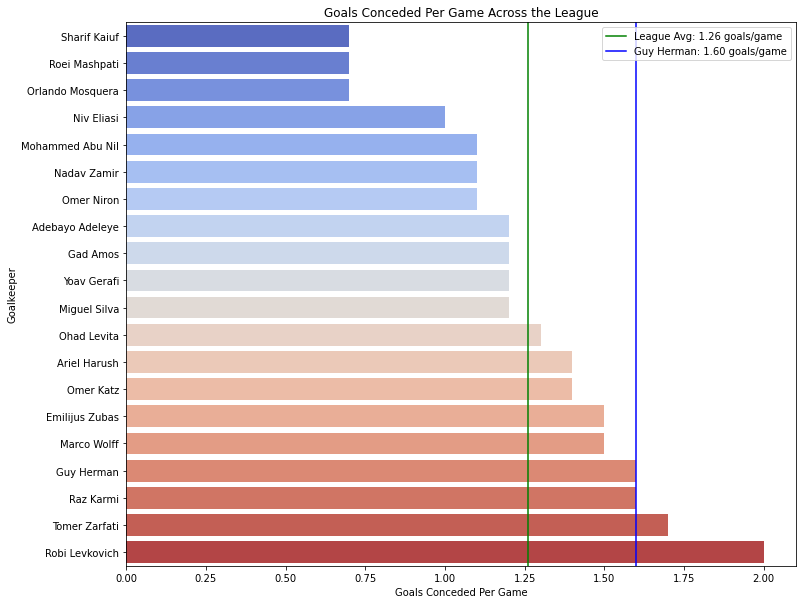

Guy Herman concedes approximately 1.6 goals per game 1.6
The league average for goals conceded per game is about 1.26. 1.26


In [20]:
goalkeepers_analysis = df[['Name', 'Total played', 'Goals conceded per game']].dropna()

goalkeepers_analysis['Goals conceded per game'] = pd.to_numeric(goalkeepers_analysis['Goals conceded per game'], errors='coerce')

# Calculate the league average goals conceded per game
average_goals_conceded = goalkeepers_analysis['Goals conceded per game'].mean()

plt.figure(figsize=(12, 10))
bar_plot = sns.barplot(x='Goals conceded per game', y='Name', data=goalkeepers_analysis.sort_values('Goals conceded per game'),
                       palette="coolwarm")
plt.axvline(x=average_goals_conceded, color='green', label=f'League Avg: {average_goals_conceded:.2f} goals/game')

# Highlight Guy Herman's performance
guy_performance = goalkeepers_analysis[goalkeepers_analysis['Name'] == 'Guy Herman']['Goals conceded per game'].values[0]
plt.axvline(x=guy_performance, color='blue', label=f'Guy Herman: {guy_performance:.2f} goals/game')
plt.title('Goals Conceded Per Game Across the League')
plt.xlabel('Goals Conceded Per Game')
plt.ylabel('Goalkeeper')
plt.legend()
plt.show()

# Insights
print("Guy Herman concedes approximately 1.6 goals per game",guy_performance)
print("The league average for goals conceded per game is about 1.26.",average_goals_conceded)



From the data and the calculations that i made the insights that probay i can think about is that Guy Herman’s goals conceded per game is higher than the league average, indicating that he might be facing more challenging situations in matches or could benefit from improvements in defensive strategies or personal skills.

Goalkeepers below the average line are performing better in terms of conceding fewer goals, whereas those above are conceding more. This visualization helps in easily identifying goalkeepers who are outperforming or underperforming relative to the league’s average.

### 2.0 Calculate the AVG numbers of saves per game for each goalkeeper and Emphasising guy stats on bar plot by using sns libary. 

/var/folders/ry/zr7hglzs6510qh8l1ct7d3lw0000gn/T/ipykernel_7190/3845225765.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  saves_bar_plot = sns.barplot(x='Saves per game', y='Name', data=goalkeepers_saves.sort_values('Saves per game', ascending=False), palette="coolwarm")


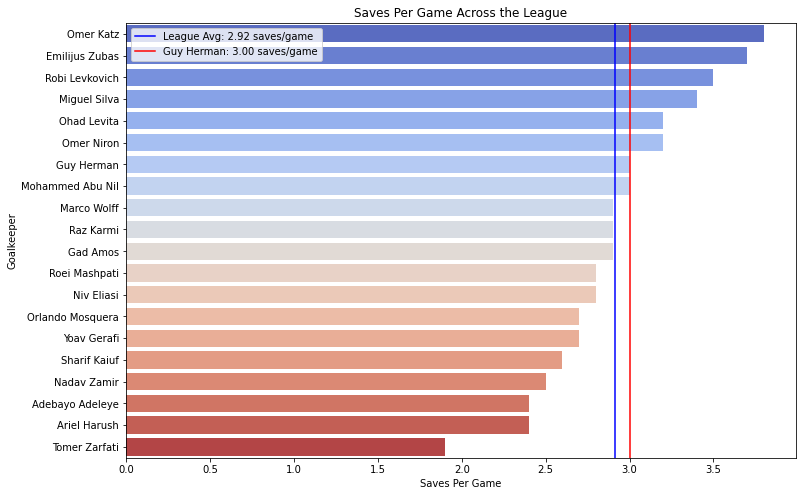

Guy Herman's Saves Per Game: 3.0
League Average Saves Per Game: 2.915


In [21]:
df['Saves per game'] = pd.to_numeric(df['Saves per game'].str.extract('(\d+\.\d+|\d+)')[0], errors='coerce')

goalkeepers_saves = df[['Name', 'Saves per game']].dropna()

# Calculate the league average for saves per game
average_saves = goalkeepers_saves['Saves per game'].mean()

# Create a bar plot for saves per game
plt.figure(figsize=(12, 8))
saves_bar_plot = sns.barplot(x='Saves per game', y='Name', data=goalkeepers_saves.sort_values('Saves per game', ascending=False), palette="coolwarm")
plt.axvline(x=average_saves, color='blue', label=f'League Avg: {average_saves:.2f} saves/game')

# Highlight Guy Herman's performance
guy_saves = goalkeepers_saves[goalkeepers_saves['Name'] == 'Guy Herman']['Saves per game'].values[0]
plt.axvline(x=guy_saves, color='Red', label=f'Guy Herman: {guy_saves:.2f} saves/game')

# Adding labels and legend
plt.title('Saves Per Game Across the League')
plt.xlabel('Saves Per Game')
plt.ylabel('Goalkeeper')
plt.legend()
plt.show()

# Print insights
print("Guy Herman's Saves Per Game:", guy_saves)
print("League Average Saves Per Game:", average_saves)

### Insights:

Guy Herman is performing slightly above the league average in terms of saves per game, which indicates a good level of performance in shot-stopping.
The visualization allows us to see goalkeepers who are particularly active in making saves, either due to their skill or possibly due to facing a high number of shots.
    

### 3.0 Goals Conceded from Inside and Outside the Box: Using “Goals conceded”, “Conceded from inside box”, and “Conceded from outside box”, we can analyze where the goals against Guy and other goalkeepers are coming from.

In [22]:
# Check data types and display the first few rows for 'Conceded from inside box' and 'Conceded from outside box' columns
df[['Conceded from inside box', 'Conceded from outside box']].dtypes, df[['Conceded from inside box', 'Conceded from outside box']].head(10)

(Conceded from inside box     int64
 Conceded from outside box    int64
 dtype: object,
    Conceded from inside box  Conceded from outside box
 0                        26                          5
 1                        18                          3
 2                        30                          2
 3                        28                          2
 4                        37                          6
 5                        32                          7
 6                        31                          5
 7                        33                         11
 8                        16                          2
 9                        18                          4)

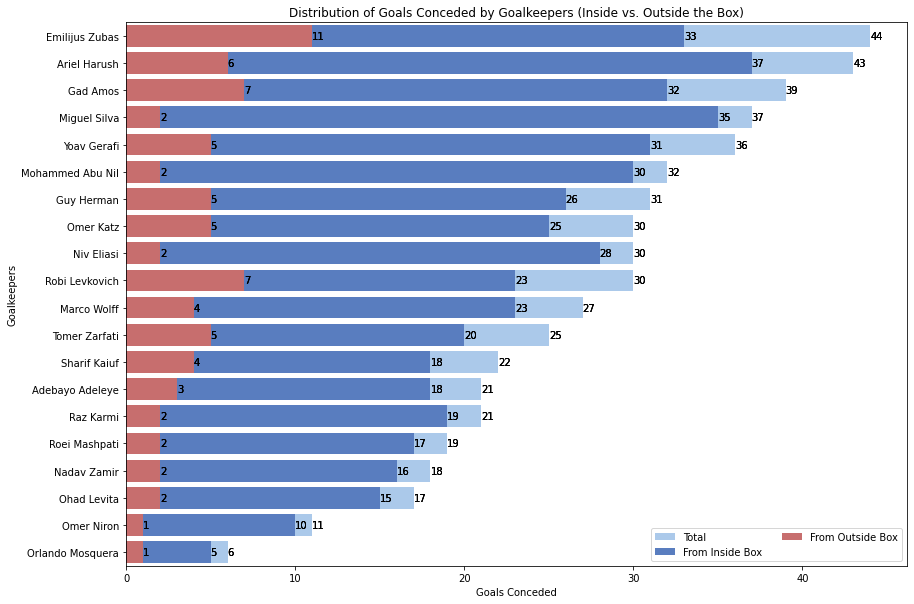

Conceded from inside box     26
Conceded from outside box     5
Total Goals Conceded         31
Name: Guy Herman, dtype: object

In [23]:
df['Total Goals Conceded'] = df['Conceded from inside box'] + df['Conceded from outside box']

# Sorting the data for consistent plotting
sorted_df = df.sort_values('Total Goals Conceded', ascending=False)

plt.figure(figsize=(14, 10))
sns.set_color_codes("pastel")
total_bar = sns.barplot(x="Total Goals Conceded", y="Name", data=sorted_df,
                        label="Total", color="b")
sns.set_color_codes("muted")
inside_box_bar = sns.barplot(x="Conceded from inside box", y="Name", data=sorted_df,
                             label="From Inside Box", color="b")
outside_box_bar = sns.barplot(x="Conceded from outside box", y="Name", data=sorted_df,
                              label="From Outside Box", color="r")

# Adding data labels
for bar in total_bar.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center')

for bar in inside_box_bar.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center')

for bar in outside_box_bar.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center')

plt.xlabel('Goals Conceded')
plt.ylabel('Goalkeepers')
plt.title('Distribution of Goals Conceded by Goalkeepers (Inside vs. Outside the Box)')
plt.legend(ncol=2, loc="lower right", frameon=True)

plt.show()

# Extract insights for Guy Herman specifically
df.set_index('Name').loc['Guy Herman', ['Conceded from inside box', 'Conceded from outside box', 'Total Goals Conceded']]

### 4.0 Clean Sheets: Compare the number of clean sheets kept by Guy with the average for all goalkeepers using “Clean sheets” and “Total played”.

In [24]:
# Sort the data by 'Clean sheets' in descending order and reset the index
clean_sheets_df = df[['Name', 'Clean sheets']].sort_values('Clean sheets', ascending=False)
clean_sheets_df.reset_index(drop=True, inplace=True)  # Reset the index and drop the old one
clean_sheets_df.index += 1  # Start the index at 1 instead of 0

# Display the updated DataFrame
clean_sheets_df

,Name,Clean sheets
1,Sharif Kaiuf,16
2,Roei Mashpati,12
3,Niv Eliasi,11
4,Yoav Gerafi,11
5,Miguel Silva,10
6,Ariel Harush,9
7,Gad Amos,9
8,Emilijus Zubas,9
9,Guy Herman,6
10,Mohammed Abu Nil,6


/var/folders/ry/zr7hglzs6510qh8l1ct7d3lw0000gn/T/ipykernel_7190/4019457200.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  clean_sheets_bar = sns.barplot(x='Clean sheets', y='Name', data=sorted_by_clean_sheets, palette='coolwarm')


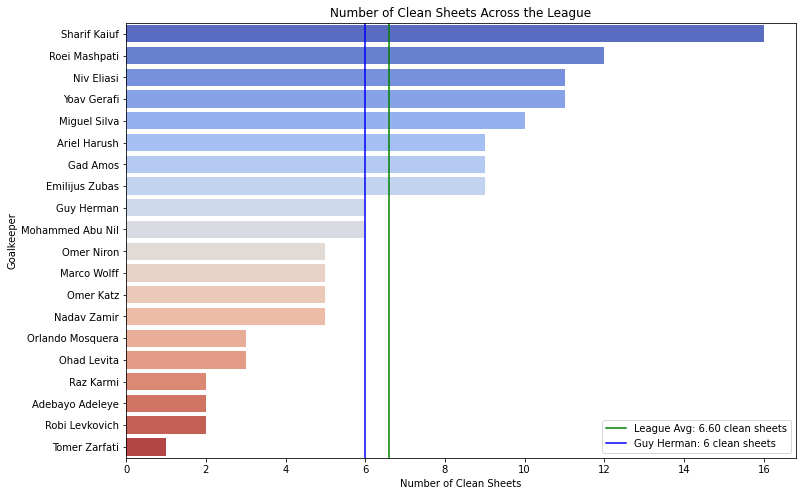

Total clean sheets by guy: 6
The avg on the league: 6.6


In [25]:
average_clean_sheets = df['Clean sheets'].mean()

sorted_by_clean_sheets = df.sort_values('Clean sheets', ascending=False)

plt.figure(figsize=(12, 8))
clean_sheets_bar = sns.barplot(x='Clean sheets', y='Name', data=sorted_by_clean_sheets, palette='coolwarm')
plt.axvline(x=average_clean_sheets, color='green', label=f'League Avg: {average_clean_sheets:.2f} clean sheets')

guy_clean_sheets = sorted_by_clean_sheets[sorted_by_clean_sheets['Name'] == 'Guy Herman']['Clean sheets'].values[0]
plt.axvline(x=guy_clean_sheets, color='blue', label=f'Guy Herman: {guy_clean_sheets} clean sheets')

plt.title('Number of Clean Sheets Across the League')
plt.xlabel('Number of Clean Sheets')
plt.ylabel('Goalkeeper')
plt.legend()

plt.show()

# Output Guy's clean sheets and the league average for reference
print("Total clean sheets by guy:",guy_clean_sheets)
print("The avg on the league:", average_clean_sheets)

In [26]:
teams = pd.read_csv("/Users/razherman/guy project/israel-israeli-premier-league-teams-2023-to-2024-stats.csv")
teams = teams[["team_name","wins","draws","losses","matches_played","goals_conceded"]].sort_values(by="goals_conceded")
teams

,team_name,wins,draws,losses,matches_played,goals_conceded
1,Maccabi Tel Aviv FC,25,7,3,35,25
8,Maccabi Haifa FC,23,7,5,35,26
0,Hapoel Be'er Sheva FC,19,4,12,35,36
12,Hapoel Katamon Jerusalem FC,12,7,14,33,39
4,Beitar Jerusalem FC,11,8,14,33,40
13,Maccabi Bnei Raina FC,11,11,13,35,42
2,Ihoud Bnei Sakhnin FC,9,15,11,35,45
5,FC Ashdod,9,10,14,33,45
6,Hapoel Haifa FC,17,5,13,35,47
3,Maccabi Netanya FC,11,5,17,33,48


### Total insights from this section: 

#### From the data it can be seen that in the current season Guy was below the general average by 0.6, which can indicate several parameters throughout the season. 

The first reason for this is related to the defensive unit, when Hapoel Hadera (the team that guy plays for) is placed at the bottom of the table in terms of the number of goals conceded throughout the season, which indicates a weak defensive unit and according to the additional data it is possible to investigate and see the reasons for stealing such a high number of goals such as player performance and intensity players throughout the 90 minutes of the game.

### 5.0 Duels and Ball Turnovers:

In [27]:
def extract_percentage(value):
    try:
        # Assuming the format is like "0.4 (80%)"
        return float(value.split('(')[-1].replace('%', '').replace(')', '').strip())
    except:
        return np.nan

df['Total duels won %'] = df['Total duels won'].apply(extract_percentage)
df['Ground duels won %'] = df['Ground duels won'].apply(extract_percentage)
df['Aerial duels won %'] = df['Aerial duels won'].apply(extract_percentage)

df['Possession lost'] = pd.to_numeric(df['Possession lost'], errors='coerce')

print(df[['Total duels won %', 'Ground duels won %', 'Aerial duels won %', 'Possession lost']])

guy_data = df[df['Name'] == 'Guy Herman'][['Total duels won %', 'Ground duels won %', 'Aerial duels won %', 'Possession lost']].values.flatten().tolist()

    Total duels won %  Ground duels won %  Aerial duels won %  Possession lost
0                80.0                60.0               100.0             10.0
1                80.0                71.0                88.0             12.1
2                78.0                83.0                76.0             12.6
3                67.0                40.0                77.0              7.2
4                91.0                75.0               100.0             10.8
5                80.0                80.0                80.0             10.6
6                69.0                50.0                86.0              8.3
7                83.0                50.0                90.0              8.6
8                70.0                33.0                86.0             10.8
9                60.0                33.0               100.0              7.1
10               93.0                75.0               100.0             10.9
11               78.0                80.0           

/var/folders/ry/zr7hglzs6510qh8l1ct7d3lw0000gn/T/ipykernel_7190/3267918705.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sample_goalkeepers['Name'], rotation=45, ha='right')


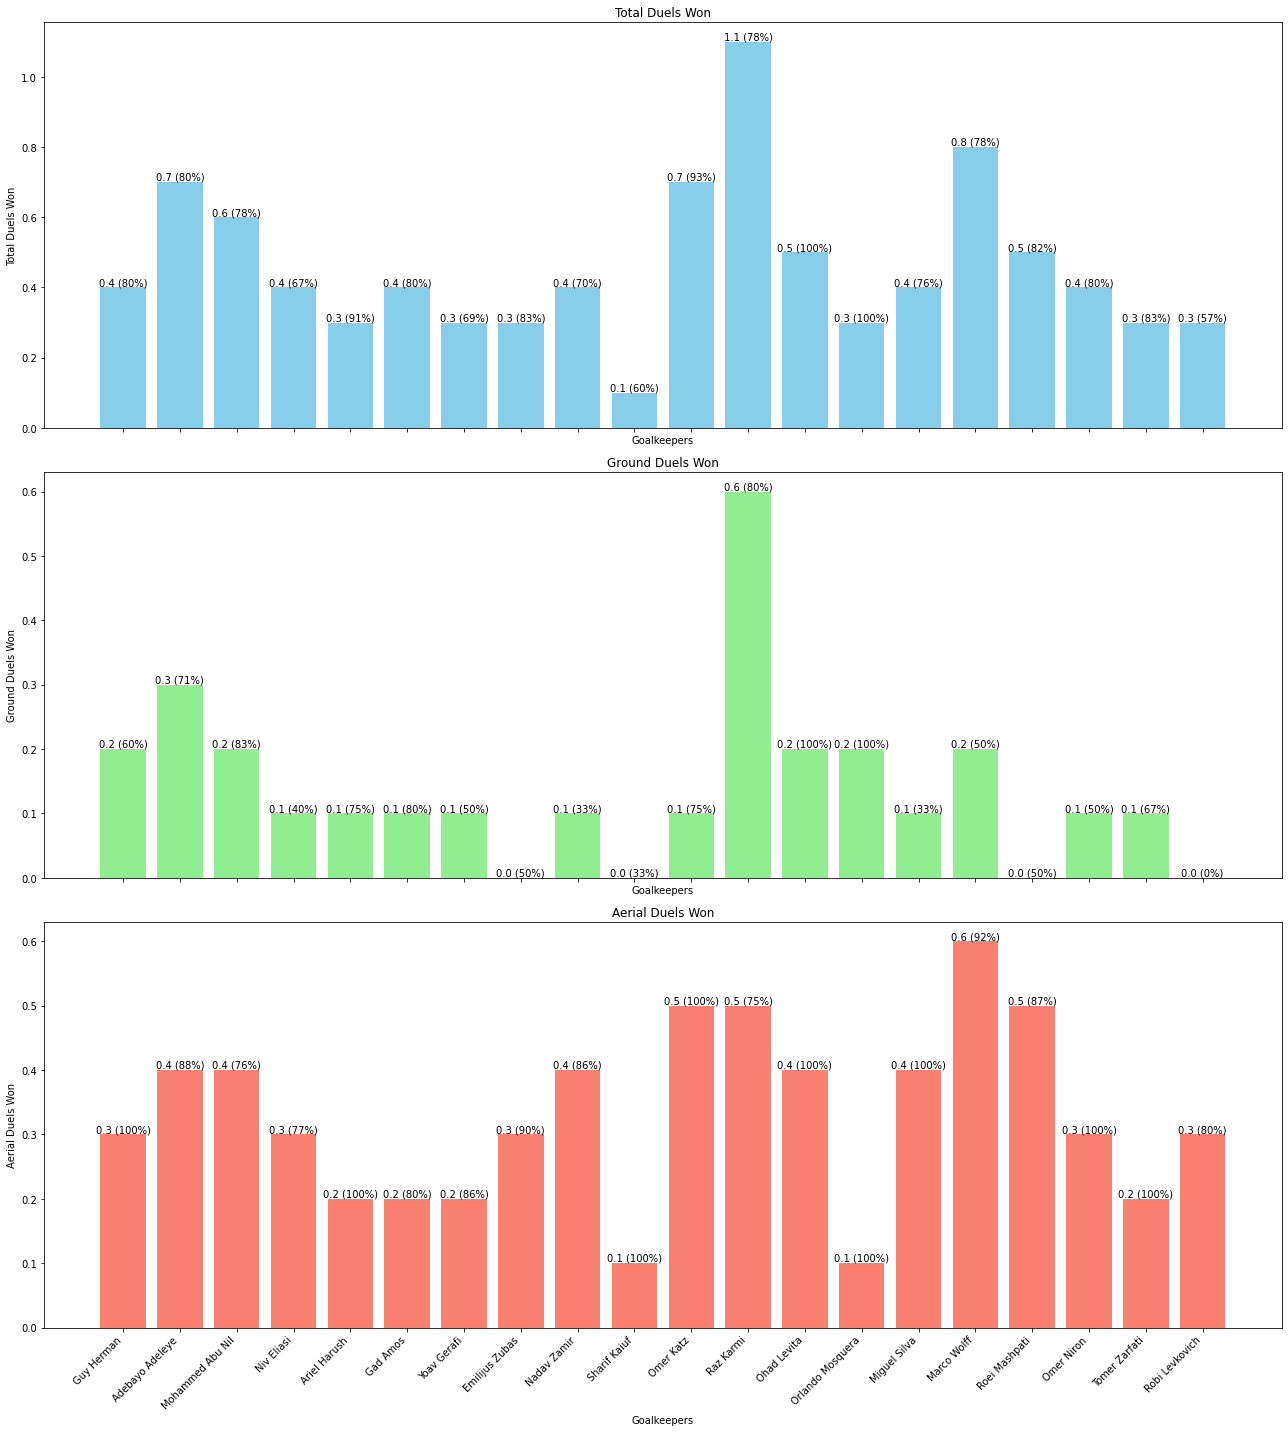

In [28]:
sample_goalkeepers = df 

fig, axes = plt.subplots(3, 1, figsize=(18, 20), sharex=True)

# Total Duels Won
axes[0].bar(sample_goalkeepers['Name'], sample_goalkeepers['Total duels won'].apply(lambda x: float(x.split()[0])), color='skyblue')
axes[0].set_ylabel('Total Duels Won')
axes[0].set_title('Total Duels Won')
# Annotate bars
for i, txt in enumerate(sample_goalkeepers['Total duels won']):
    axes[0].text(i, float(txt.split()[0]), txt, ha='center', va='bottom', rotation=0)

# Ground Duels Won
axes[1].bar(sample_goalkeepers['Name'], sample_goalkeepers['Ground duels won'].apply(lambda x: float(x.split()[0])), color='lightgreen')
axes[1].set_ylabel('Ground Duels Won')
axes[1].set_title('Ground Duels Won')
# Annotate bars
for i, txt in enumerate(sample_goalkeepers['Ground duels won']):
    axes[1].text(i, float(txt.split()[0]), txt, ha='center', va='bottom', rotation=0)

# Aerial Duels Won
axes[2].bar(sample_goalkeepers['Name'], sample_goalkeepers['Aerial duels won'].apply(lambda x: float(x.split()[0])), color='salmon')
axes[2].set_ylabel('Aerial Duels Won')
axes[2].set_title('Aerial Duels Won')
# Annotate bars
for i, txt in enumerate(sample_goalkeepers['Aerial duels won']):
    axes[2].text(i, float(txt.split()[0]), txt, ha='center', va='bottom', rotation=0)

# Set common labels
for ax in axes:
    ax.set_xticklabels(sample_goalkeepers['Name'], rotation=45, ha='right')
    ax.set_xlabel('Goalkeepers')

plt.tight_layout()
plt.show()


#### insights from this section about guy herman analysis:

1.Overall Duel Performance:

“Looking at Guy Herman’s overall duels won, I notice that his involvement and effectiveness in contests are quite telling. A higher count here suggests that Guy is        proactive and decisive in defending situations, showcasing his capability to engage effectively with opponents. This trait is essential for any goalkeeper, reflecting their alertness and readiness during matches. If the numbers were lower, it would point to areas where Guy could enhance his engagement and defensive presence.”

2.Ground Duel Skills:

“In terms of ground duels won, Guy’s performance gives us a clear insight into his reflex abilities and how well he handles threats close to the ground. Excelling in this area means he is adept at managing low shots, through balls, and ground crosses, which are critical skills for preventing goals. This effectiveness indicates strong reflexes and a good understanding of ground-level play dynamics. Should there be room for improvement, focusing on reaction time and techniques for ground ball defense would be beneficial.”

3.Aerial Duel Abilities:

“Guy’s ability to manage aerial duels is another crucial aspect of his game. A high score in aerial duels won suggests he is competent at intercepting crosses and dealing with aerial challenges, a vital skill in matches that involve a lot of high balls and set-pieces. Being strong in this area not only helps in keeping the goal safe but also boosts the overall defense strategy, especially against teams that favor aerial attacks. If improvements are needed, enhancing his jumping technique, timing, and physicality in the air could be key focus areas.”